# 0. Introdução

No mundo competitivo do marketing digital, entender como diferentes campanhas performam pode fazer toda a diferença. Este projeto aplica a metodologia de teste A/B para comparar duas campanhas de marketing, avaliando suas métricas de desempenho e identificando como cada uma pode contribuir para estratégias mais eficientes. Os datasets utilizados foram importados do kaggle e podem ser acessados na íntegra em: https://www.kaggle.com/datasets/amirmotefaker/ab-testing-dataset 

# 1. Importando Bibliotecas

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from scipy.stats import ttest_ind

plt.style.use('ggplot')  # estiliza o plt como ggplot

# 2. Importando Datasets

In [52]:
path1 = 'test_group.csv' 
path2 = 'control_group.csv'

teste = pd.read_csv(path1, sep=";")
controle = pd.read_csv(path2, sep=";")

In [53]:
# define o caminho dos datasets como as variáveis path1
# e path 2 e lê os arquivos usando o método pd.read_csv

# 3. Análise Estrutural

In [54]:
teste.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [55]:
controle.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
teste.tail()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
25,Test Campaign,26.08.2019,2311,80841,61589,3820,2037,1046,346,284
26,Test Campaign,27.08.2019,2915,111469,92159,6435,2976,2552,992,771
27,Test Campaign,28.08.2019,2247,54627,41267,8144,2432,1281,1009,721
28,Test Campaign,29.08.2019,2805,67444,43219,7651,1920,1240,1168,677
29,Test Campaign,30.08.2019,1977,120203,89380,4399,2978,1625,1034,572


In [57]:
controle.tail()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
25,Control Campaign,26.08.2019,2233,124897.0,98432.0,5435.0,2847.0,2421.0,1448.0,251.0
26,Control Campaign,27.08.2019,2061,104678.0,91579.0,4941.0,3549.0,3249.0,980.0,605.0
27,Control Campaign,28.08.2019,2421,141654.0,125874.0,6287.0,1672.0,1589.0,1711.0,643.0
28,Control Campaign,29.08.2019,2375,92029.0,74192.0,8127.0,4891.0,4219.0,1486.0,334.0
29,Control Campaign,30.08.2019,2324,111306.0,88632.0,4658.0,1615.0,1249.0,442.0,670.0


In [58]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [59]:
controle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


Após a análise estrutural verificamos a existência
de valores nulos no conjunto controle que terão de 
ser preenchidos. Há também inconsistências nos datatypes
que serão corrigidas nos próximos passos

# 4. Limpeza e Preparação dos Datasets

In [60]:
teste[teste.select_dtypes(include=['int']).columns] = \
    teste.select_dtypes(include=['int']).astype(float)

In [61]:
controle[controle.select_dtypes(include=['int']).columns] = \
    controle.select_dtypes(include=['int']).astype(float)

In [62]:
# formatei todas as colunas tipo int em ambos os dataset
# como float pra facilitar operações

In [63]:
teste['Date'] = pd.to_datetime(teste['Date'], format='%d.%m.%Y')

In [64]:
teste['Date'] = teste['Date'].dt.strftime('%d/%m/%Y')

In [65]:
controle['Date'] = pd.to_datetime(controle['Date'], format='%d.%m.%Y')

In [66]:
controle['Date'] = controle['Date'].dt.strftime('%d/%m/%Y')

In [67]:
# formatei corretamente as colunas 'Date' em ambos os 
# datasets

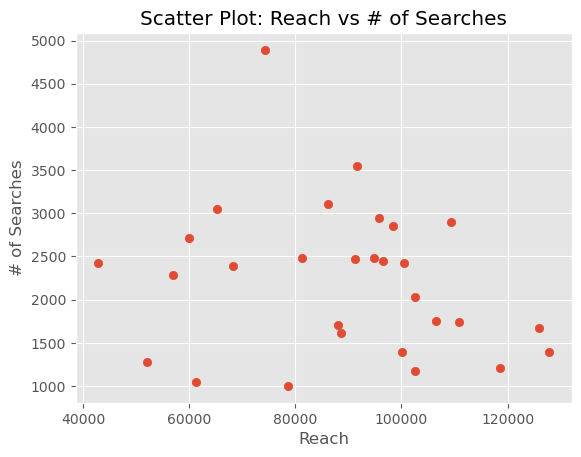

In [68]:
plt.scatter(controle['Reach'], controle['# of Searches'])
plt.xlabel('Reach')
plt.ylabel('# of Searches')
plt.title('Scatter Plot: Reach vs # of Searches')
plt.show()

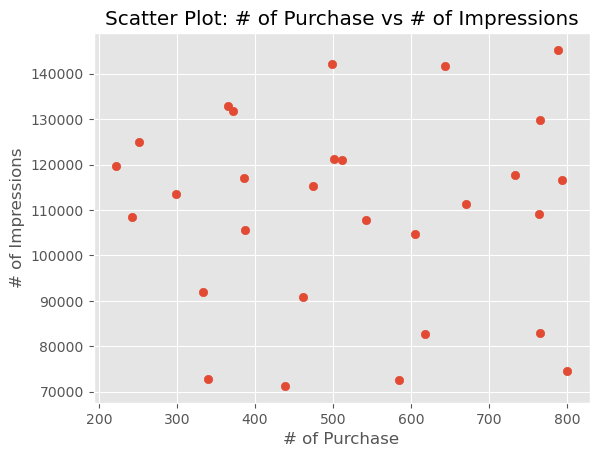

In [69]:
plt.scatter(controle['# of Purchase'], controle['# of Impressions'])
plt.xlabel('# of Purchase')
plt.ylabel('# of Impressions')
plt.title('Scatter Plot: # of Purchase vs # of Impressions')
plt.show()

In [70]:
# Plotei os gráficos acima pra verificar os outliers
# e decidir se usaria a média ou a mediana pra preencher
# os valores nulos

In [71]:
controle_numericas = [
    '# of Impressions',
    'Reach',
    '# of Website Clicks',
    '# of Searches',
    '# of View Content',
    '# of Add to Cart',
    '# of Purchase'
]

controle[controle_numericas] = \
    controle[controle_numericas].fillna(controle[controle_numericas].median())

In [72]:
# como visto acima, optei pelas medianas.

# 5. Teste Estatístico das Métricas de Desempenho

In [73]:
# Defini as métricas do teste
metricas = [
    '# of Impressions',
    'Reach',
    '# of Website Clicks',
    '# of Searches',
    '# of View Content',
    '# of Add to Cart',
    '# of Purchase'
]
# Criei um loop pra realizar o teste t em cada uma das métricas
for metrica in metricas:
    grupo_controle = controle[metrica].to_numpy()  # Seleciona a coluna como array
    grupo_teste = teste[metrica].to_numpy()  # Seleciona a coluna como array

    # Teste t
    stat, p_value = ttest_ind(grupo_controle, grupo_teste, equal_var=False)

    print(f"Métrica: {metrica}")
    print(f"Estatística do teste: {stat:.4f}")
    print(f"Valor-p: {p_value:.4f}\n")

Métrica: # of Impressions
Estatística do teste: 4.9870
Valor-p: 0.0000

Métrica: Reach
Estatística do teste: 5.4059
Valor-p: 0.0000

Métrica: # of Website Clicks
Estatística do teste: -1.6116
Valor-p: 0.1125

Métrica: # of Searches
Estatística do teste: -1.1236
Valor-p: 0.2678

Métrica: # of View Content
Estatística do teste: 0.4920
Valor-p: 0.6247

Métrica: # of Add to Cart
Estatística do teste: 4.3360
Valor-p: 0.0001

Métrica: # of Purchase
Estatística do teste: 0.0164
Valor-p: 0.9870



##### Considerações a respeito do teste t:

 - O teste t foi escolhido para comparar as médias das campanhas de controle e teste, pois permite avaliar se as diferenças observadas nas métricas de desempenho são estatisticamente significativas.
- Quanto mais próximo de 0 o valor-p, mais significativa é a diferença entre as campanhas, indicando que é menos provável que a diferença seja por acaso.
 - Quanto maior o valor absoluto da estatística do teste, maior é a diferença entre as médias dos grupos em relação à variabilidade dos dados.
 - Se o valor-p for menor que 0,05, a diferença é considerada estatisticamente significativa, sugerindo que as campanhas têm desempenhos distintos.
 - Estatística do teste próxima de 0 indica que as médias dos grupos são semelhantes, com baixa diferença entre as campanhas. 


### Impressions

 - Controle: 3,290,663
 - Teste: 2,237,544
 - Estatística do teste: 4.9870
 - Valor-p: 0.0000
 - Interpretação: A campanha de controle gerou significativamente mais impressões do que a campanha de teste. O valor-p de 0.0000 indica que essa diferença é altamente significativa, sugerindo que a estratégia de controle foi muito mais eficaz em alcançar uma audiência maior.

### Reach

 - Controle: 2,668,082
 - Teste: 1,604,747
 - Estatística do teste: 5.4059
 - Valor-p: 0.0000
 - Interpretação: A campanha de controle também teve um alcance significativamente maior. O valor-p confirma que essa diferença é estatisticamente significativa, indicando que a campanha de teste não conseguiu atingir uma quantidade comparável de usuários.

### Website Clicks

 - Controle: 159,527
 - Teste: 180,970
 - Estatística do teste: -1.6116
 - Valor-p: 0.1125
 - Interpretação: Apesar da campanha de teste ter gerado mais cliques no site, o valor-p de 0.1125 sugere que essa diferença não é estatisticamente significativa. Isso indica que a campanha de controle ainda teve um desempenho aceitável em gerar cliques, mas a diferença observada pode ser atribuída ao acaso.

### Searches

 - Controle: 66,808
 - Teste: 72,569
 - Estatística do teste: -1.1236
 - Valor-p: 0.2678
 - Interpretação: O número de buscas foi ligeiramente maior na campanha de teste, mas o valor-p de 0.2678 indica que essa diferença não é estatisticamente significativa. Isso sugere que, embora a campanha de teste tenha gerado um número maior de buscas, a diferença não é forte o suficiente para ser considerada significativa.

### View Content

 - Controle: 58,354
 - Teste: 55,740
 - Estatística do teste: 0.4920
 - Valor-p: 0.6247
 - Interpretação: A campanha de controle teve um número ligeiramente maior de visualizações de conteúdo. O valor-p de 0.6247 confirma que não há uma diferença significativa entre os grupos, indicando que ambas as campanhas tiveram um desempenho semelhante em engajar os usuários com o conteúdo.

### Add to Cart

 - Controle: 39,039
 - Teste: 26,446
 - Estatística do teste: 4.3360
 - Valor-p: 0.0001
 - Interpretação: A campanha de controle teve um número significativamente maior de itens adicionados ao carrinho, e o valor-p de 0.0001 indica que essa diferença é estatisticamente significativa. Isso sugere que a campanha de teste não foi tão eficaz em incentivar os usuários a adicionar produtos ao carrinho.

### Purchases

 - Controle: 15,662
 - Teste: 15,637
 - Estatística do teste: 0.0164
 - Valor-p: 0.9870
 - Interpretação: O número de compras foi praticamente igual entre as campanhas. O valor-p de 0.9870 indica que não há diferença significativa, sugerindo que, apesar das variações em outras métricas, a taxa de conversão final não foi afetada pelas mudanças entre as campanhas.


# 6. Gráficos

In [74]:

controle = controle.drop(columns=['Date', 'Campaign Name'])
controle = controle.sum()

teste = teste.drop(columns=['Date', 'Campaign Name'])
teste = teste.sum()
# dropei as colunas date e campaign name
# somei as variáveis que iremos plotar
dataset_comparativo = pd.concat([controle, teste], axis=1)
# juntei ambos os datasets
dataset_comparativo = dataset_comparativo.reset_index()
# e resetei o índice para que as métricas não ocupem essa função

dataset_comparativo.columns = ['Métrica', 'Controle', 'Teste']
# renomeei as colunas adequadamente antes de plotar os gráficos
for i, row in dataset_comparativo.iterrows():
    # Optei por criar um for loop e plotar os gráficos que utilizaremos
    # de uma única vez
    # Preparei o DataFrame para criar gráfico de pizza
    df_pizza = pd.DataFrame({
        'Grupo': ['Controle', 'Teste'],
        'Valor': [row['Controle'], row['Teste']]
    })

    # Criei o gráfico de pizza
    grafico = px.pie(df_pizza, values='Valor', names='Grupo', width=300, height=300,
            title=f"{row['Métrica']} - Controle x Teste",

    )
    grafico.show()
    print('                                                             ')

# 7. Conclusões

 - A campanha controle se destaca por um custo por conversão menor e por gerar mais alcance e impressões, tornando-se ideal para a promoção de múltiplos produtos para uma audiência variada. Isso contribui para o aumento da visibilidade da marca, ao atingir e atrair o maior número de clientes possível.

 - A campanha teste pode ser usada para promover produtos mais nichados ou sazonais, que requerem um público engajado, ou como uma campanha de remarketing voltada para clientes que já demonstraram interesse anteriormente.

#### Resumo 
<p> A campanha controle é a escolha óbvia para maximizar o alcance e otimizar o custo por conversão, enquanto a campanha teste oferece uma oportunidade de engajar mais profundamente um público específico. Integrar ambas pode ser a chave para uma estratégia de marketing diversificada e eficiente, que amplie a base de clientes da empresa e ao mesmo tempo os fidelize.</p>

#### Recomendação

A Recomendação é manter a campanha de controle para atingir objetivos de awareness, garantindo um amplo alcance e maior visibilidade da marca. A campanha de teste deve ser utilizada para segmentar audiências mais específicas, maximizando o retorno sobre o investimento ao engajar e reter clientes que já demonstraram interesse, enquanto fortalece o reconhecimento da marca entre o público-alvo.